# Statistics for Data Science with Python

In [53]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats  as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(url)
boston_df.head()
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot
* Boxplot for MEDV

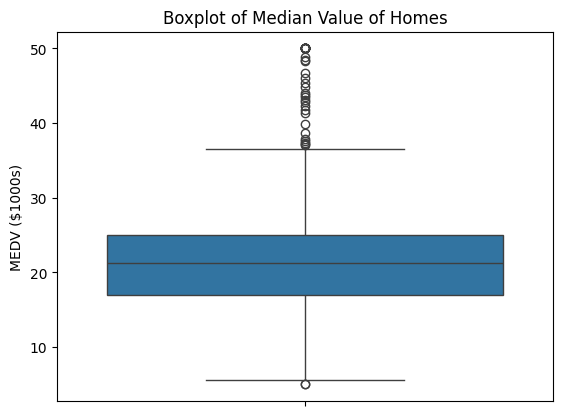

In [55]:
#plt.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Homes')
plt.ylabel('MEDV ($1000s)')
plt.show()

### Provide a  bar plot for the Charles river variable
* Bar plot for CHAS

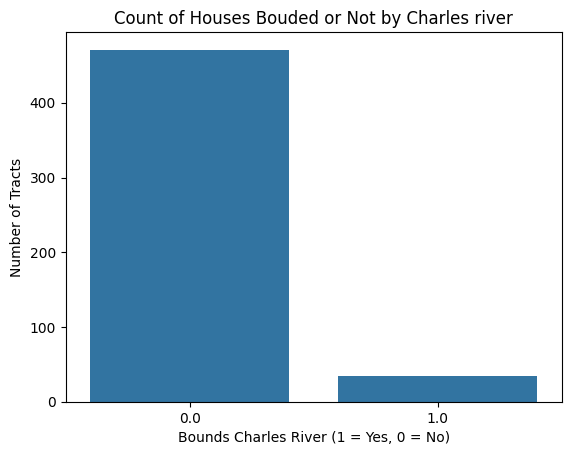

In [56]:
sns.barplot(boston_df['CHAS'].value_counts())
plt.title('Count of Houses Bouded or Not by Charles river')
plt.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
plt.ylabel('Number of Tracts')
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Boxplot of MEDV vs AGE groups

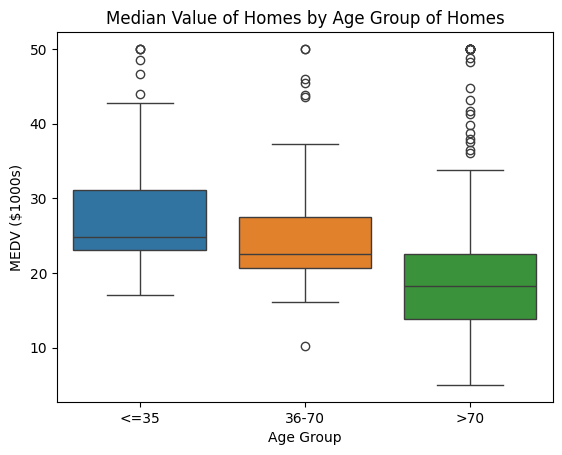

In [57]:
age_bins = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '>70'])
boston_df['AGE_GROUP'] = age_bins
sns.boxplot(x='AGE_GROUP', y='MEDV', hue='AGE_GROUP', data=boston_df)
plt.title('Median Value of Homes by Age Group of Homes')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Scatter plot: NOX vs INDUS

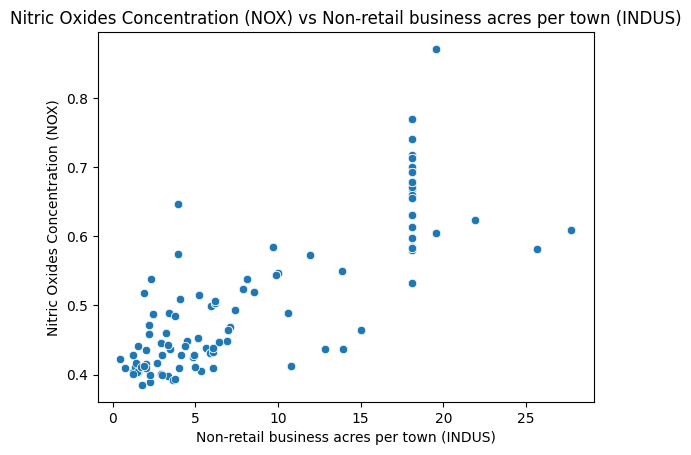

In [58]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxides Concentration (NOX) vs Non-retail business acres per town (INDUS)')
plt.xlabel('Non-retail business acres per town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

### Create a histogram for the pupil to teacher ratio variable
* Histogram for PTRATIO

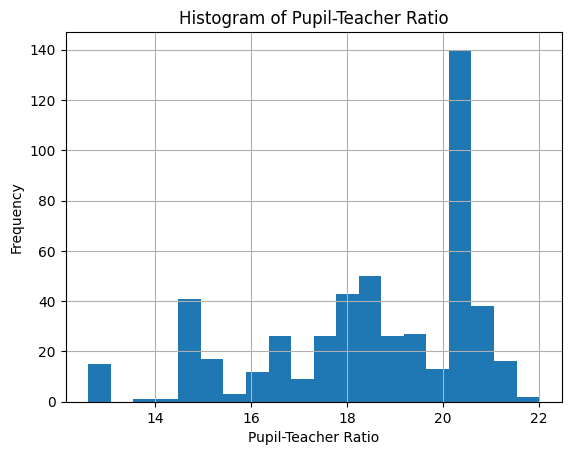

In [59]:
boston_df['PTRATIO'].hist(bins=20)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Task 3: Statistical Tests

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* T-test: MEDV for CHAS

In [60]:
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV'] 
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV'] 
t_stat, p_val = stats.ttest_ind(chas_1, chas_0) 
print("T-test: MEDV ~ CHAS") 
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}") 
if p_val < 0.05: print("Conclusion: Significant difference in MEDV for CHAS groups") 
else: print("Conclusion: No significant difference in MEDV for CHAS groups")

T-test: MEDV ~ CHAS
t-statistic = 3.9964, p-value = 0.0001
Conclusion: Significant difference in MEDV for CHAS groups


In [61]:
t_stat, p_value = stats.f_oneway(chas_0, chas_1)
print(t_stat, p_value)

15.971512420371955 7.390623170520815e-05


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* ANOVA: MEDV ~ AGE_GROUP

In [62]:
anova_model = ols('MEDV ~ AGE_GROUP', data=boston_df).fit() 
anova_table = sm.stats.anova_lm(anova_model, typ=3) 
print("\nANOVA: MEDV ~ AGE_GROUP") 
print(anova_table) 
if anova_table['PR(>F)'].iloc[0] < 0.05: print("Conclusion: Significant difference in MEDV across AGE groups") 
else: print("Conclusion: No significant difference in MEDV across AGE groups")


ANOVA: MEDV ~ AGE_GROUP
                 sum_sq     df           F         PR(>F)
Intercept  70206.173187    1.0  946.378619  1.122421e-117
AGE_GROUP   5401.731883    2.0   36.407650   1.710501e-15
Residual   37314.563532  503.0         NaN            NaN
Conclusion: Significant difference in MEDV across AGE groups


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* Pearson Correlation: NOX vs INDUS

In [63]:
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) 
print("\nPearson Correlation: NOX vs INDUS") 
print(f"Correlation = {corr:.4f}, p-value = {p_value:.4f}") 
if p_value < 0.05: print("Conclusion: Significant relationship between NOX and INDUS") 
else: print("Conclusion: No significant relationship between NOX and INDUS")


Pearson Correlation: NOX vs INDUS
Correlation = 0.7637, p-value = 0.0000
Conclusion: Significant relationship between NOX and INDUS


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
* Regression: DIS on MEDV

In [64]:
X = sm.add_constant(boston_df['DIS']) 
model = sm.OLS(boston_df['MEDV'], X).fit() 
print("\nRegression Analysis: MEDV ~ DIS") 
print(model.summary()) 
if model.pvalues['DIS'] < 0.05: print("Conclusion: DIS has a significant impact on MEDV") 
else: print("Conclusion: DIS has no significant impact on MEDV")


Regression Analysis: MEDV ~ DIS
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        19:02:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.39